In [ ]:
import pandas as pd
import seaborn as sns
import os
from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt
!pip install squarify
import squarify
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# If you don't want to download data from kaggle
files.upload() # here choose kaggle.json
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!kaggle datasets list -s h-and-m-personalized-fashion-recommendations

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [03:55<00:00, 152MB/s]
100% 28.7G/28.7G [03:55<00:00, 131MB/s]


In [ ]:
# Bad way as there are lots of images
#!unzip h-and-m-personalized-fashion-recommendations.zip -d data

In [ ]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('h-and-m-personalized-fashion-recommendations.zip', 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
       # Check filename ends with csv
       if fileName.endswith('.csv'):
           # Extract a single file from zip
           zipObj.extract(fileName)

In [ ]:
# Read data
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

# Articles
Сontribution: Kristina Denisova

In [ ]:
 articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
# Select the most interesting columns

articles = articles[['article_id', 'product_code', 'prod_name',
       'product_type_name', 'product_group_name', 'colour_group_name',
       'department_name', 'index_name', 'index_group_name', 'section_name']]

In [ ]:
articles.product_group_name.unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [ ]:
# Let's analyse what is the most diverse type of cloth in terms of number of items.
type_group = articles.groupby(['product_group_name'], as_index = False).count()
type_group = type_group.iloc[:,:2]
type_group.columns = ['categories', 'number_of_items']
type_group['number_of_items'].sum()
type_group['share_category, %'] = type_group['number_of_items']/type_group['number_of_items'].sum()*100
type_group.sort_values(by=['share_category, %'], ascending=False)
#Сontribution: Tatyana Shelovanova and Kristina Denisova

,categories,number_of_items,"share_category, %"
7,Garment Upper body,42741,40.496674
6,Garment Lower body,19812,18.771674
5,Garment Full body,13292,12.594038
0,Accessories,11158,10.572095
16,Underwear,5490,5.201721
12,Shoes,5283,5.005590
15,Swimwear,3127,2.962802
13,Socks & Tights,2442,2.313771
11,Nightwear,1899,1.799284
18,Unknown,121,0.114646


In [ ]:
type_group = type_group[type_group['number_of_items'] > 2000]
#type_group['scale'] = (type_group['number_of_items'] - min(type_group['number_of_items']))/min(type_group['number_of_items'])
type_group

,categories,number_of_items,"share_category, %"
0,Accessories,11158,10.572095
5,Garment Full body,13292,12.594038
6,Garment Lower body,19812,18.771674
7,Garment Upper body,42741,40.496674
12,Shoes,5283,5.005590
13,Socks & Tights,2442,2.313771
15,Swimwear,3127,2.962802
16,Underwear,5490,5.201721


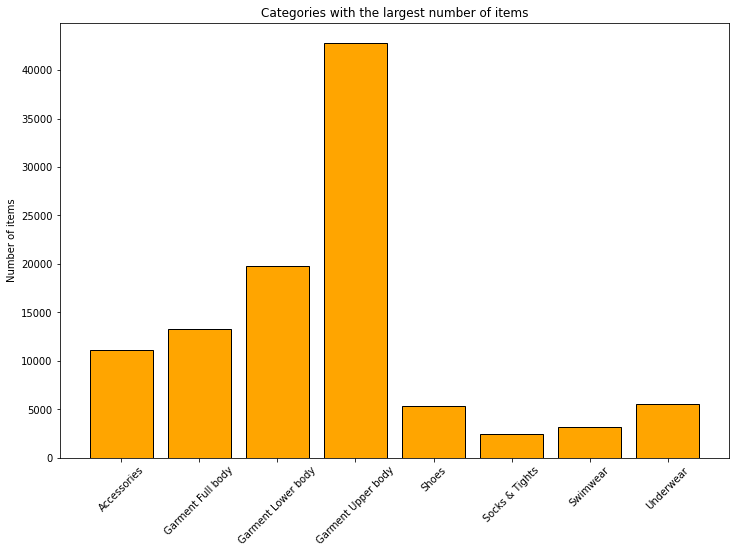

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(type_group['categories'], type_group['number_of_items'], color = "orange", edgecolor = "black")
plt.xticks(rotation = 45)
plt.title("Categories with the largest number of items")
plt.ylabel("Number of items")
plt.show()

Short conclusion: H&M sells 42741 items of **upper body** clothes, which is 40%  out of all selling items. It means that for this category **the diversity of items is the highest one.**
Top categories in terms of number of items: 
1. Garment Upper body	
2. Garment Lower body	
3. Garment Full body	

<BarContainer object of 7 artists>

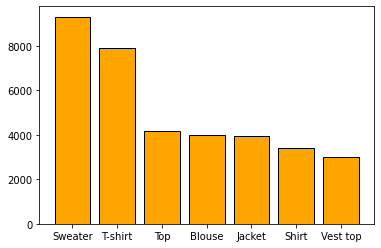

In [ ]:
# Now let's analyse what types of clothes is sold Top categories
# Garment Upper body 
articles_upper = articles.loc[articles['product_group_name'] == 'Garment Upper body']
type_upper = articles_upper.groupby(['product_type_name'], as_index = False).count().iloc[:,:2].sort_values(by=['article_id'], ascending=False)
type_upper.columns = ['Types', 'number_of_items']
plt.bar(type_upper.iloc[:7]['Types'], type_upper.iloc[:7]['number_of_items'], color = "orange", edgecolor = "black")
#Сontribution: Tatyana Shelovanova

<BarContainer object of 5 artists>

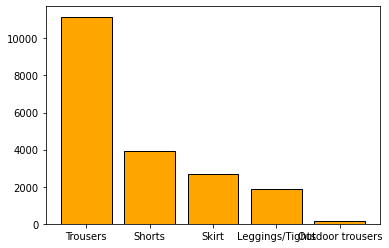

In [ ]:
# Garment Lower body 
articles_lower = articles.loc[articles['product_group_name'] == 'Garment Lower body']
type_lower = articles_lower.groupby(['product_type_name'], as_index = False).count().iloc[:,:2].sort_values(by=['article_id'], ascending=False)
type_lower.columns = ['Types', 'number_of_items']
plt.bar(type_lower.iloc[:7]['Types'], type_lower.iloc[:7]['number_of_items'], color = "orange", edgecolor = "black")
#Сontribution: Tatyana Shelovanova

<BarContainer object of 5 artists>

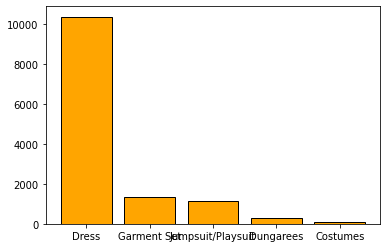

In [ ]:
#Garment Full body
articles_lower = articles.loc[articles['product_group_name'] == 'Garment Full body']
type_lower = articles_lower.groupby(['product_type_name'], as_index = False).count().iloc[:,:2].sort_values(by=['article_id'], ascending=False)
type_lower.columns = ['Types', 'number_of_items']
plt.bar(type_lower.iloc[:5]['Types'], type_lower.iloc[:5]['number_of_items'], color = "orange", edgecolor = "black")
#Сontribution: Tatyana Shelovanova

# Customers
Сontribution: Kristina Denisova

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


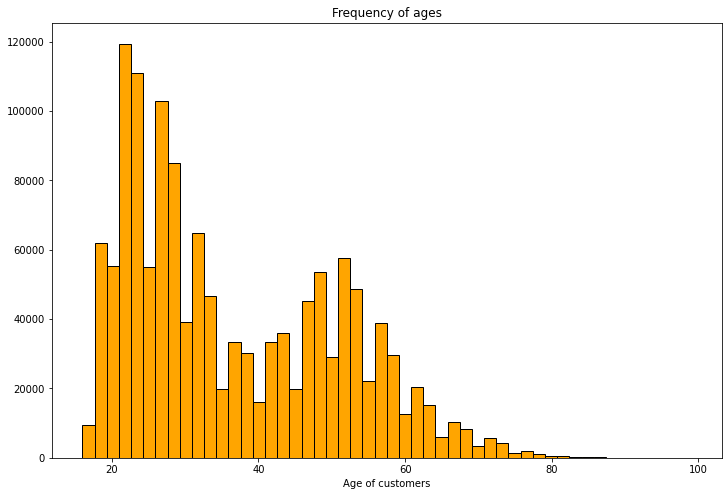

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(customers.age, edgecolor = 'black', color = 'orange', bins = 50);
plt.title("Frequency of ages")
plt.xlabel("Age of customers");

The histogram shows that the most nuber of purchases are made by people of 20-30 age years old

In [ ]:
member = customers.groupby(['club_member_status'], as_index = False).count()
y = customers.club_member_status.unique()

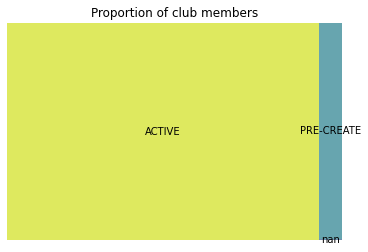

In [ ]:
squarify.plot(sizes = member.customer_id,
              label = y, alpha = 0.7)
plt.axis('off')
plt.title("Proportion of club members")
plt.show()

We have a large group of active club memebers. So, these types can have something like a recommendation system or special sales. Also it maybe mean that there is a significant part of regualar customers

In [ ]:
news = customers.groupby(['fashion_news_frequency'], as_index = False).count()
news = news[news['customer_id'] > 100]  # To avoid None that have 2 persons
y = news.fashion_news_frequency.unique()

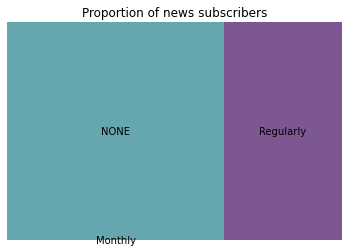

In [ ]:
squarify.plot(sizes = news.customer_id,
              label = y, alpha = 0.7)
plt.axis('off')
plt.title("Proportion of news subscribers")
plt.show()

Most part does not recieve recommendations from the cite and maybe potentially is not interested in recommendations

# Transactions

Сontribution: Kristina Denisova

In [ ]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [ ]:
mean_price = transactions.groupby(['t_dat', 'customer_id'], as_index = False)['price'].mean()
mean_price

,t_dat,customer_id,price
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.040661
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.017271
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0.038119
3,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,0.021424
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0.023768
...,...,...,...
9080174,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,0.031810
9080175,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.050831
9080176,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0.043203
9080177,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0.006763


In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(mean_price.price, edgecolor = 'black', color = 'orange', bins = 50, range = [0.0, 0.2]);
plt.title("Average price for purchase")
plt.xlabel("Price");  # Unfortunetly, there is no information about units

In [ ]:
mean_transactions = transactions.groupby(['t_dat', 'customer_id'], as_index = False)['article_id'].count()
mean_transactions

In [ ]:
# Average number of iteams, that a consumer buys
mean_transactions.article_id.mean()

3.500847725578978

On average, a customer buys 3-4 items

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(mean_transactions.article_id, edgecolor = 'black', color = 'orange', bins = 20, range = [0.0, 30]);
plt.xlabel("Number of purchases");
# Think how to cut the range of a histogram

In [ ]:
popular_items = transactions.groupby(['article_id'], as_index = False)['t_dat'].count()
top_items = popular_items.sort_values(['t_dat'], ascending = False)[:20]  # Top 20 items 
top_items = top_items.rename(columns = {"t_dat":"count"})

In [ ]:
result = pd.merge(top_items, articles, on = "article_id")
result  # We can just recommend customers to buy the most popular items

,article_id,count,product_code,prod_name,product_type_name,product_group_name,colour_group_name,department_name,index_name,index_group_name,section_name
0,706016001,50287,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Trousers,Divided,Divided,Divided Collection
1,706016002,35043,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Trousers,Divided,Divided,Divided Collection
2,372860001,31718,372860,7p Basic Shaftless,Socks,Socks & Tights,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh"
3,610776002,30199,610776,Tilly (1),T-shirt,Garment Upper body,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics
4,759871002,26329,759871,Tilda tank,Vest top,Garment Upper body,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other
5,464297007,25025,464297,Greta Thong Mynta Low 3p,Underwear bottom,Underwear,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie
6,372860002,24458,372860,7p Basic Shaftless,Socks,Socks & Tights,White,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh"
7,610776001,22451,610776,Tilly (1),T-shirt,Garment Upper body,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics
8,399223001,22236,399223,Curvy Jeggings HW Ankle,Trousers,Garment Lower body,Black,Denim Trousers,Divided,Divided,Ladies Denim
9,706016003,21241,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Trousers,Divided,Divided,Divided Collection


First of all we can try to model KNN. So, we predict the item according to customer features (age, activity, previous purchases), find 'neighbours' and understand what we can recommend them based on the choice of the closest customers
First of all we should prepare the data. We add some features from customers table to transactions_train data

In [ ]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [ ]:
customs = customers[['customer_id', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']]

In [ ]:
customs.club_member_status.unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [ ]:
customs.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [ ]:
# We have some categories that should be noted as 'not defined'
# However, we have some different combinations for this category in 'fashion_news_frequency'
# And 'nan' in 'club_member_status'

customs.club_member_status = customs.club_member_status.fillna(0)
customs.club_member_status = customs.club_member_status.replace(0, "NOT_DEF")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
customs.fashion_news_frequency = customs.fashion_news_frequency.fillna(0)
customs.fashion_news_frequency = customs.fashion_news_frequency.replace(['None', 0], 'NONE')

In [ ]:
customs = pd.get_dummies(customs, columns = ['fashion_news_frequency', 'club_member_status'], drop_first = True)

In [ ]:
customs

,customer_id,age,postal_code,fashion_news_frequency_NONE,fashion_news_frequency_Regularly,club_member_status_LEFT CLUB,club_member_status_NOT_DEF,club_member_status_PRE-CREATE
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1,0,0,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,0,0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1,0,0,0,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1,0,0,0,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1,0,0,0,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0,1,0,0,0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,0,1,0,0,0


In [ ]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [ ]:
transactions.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [ ]:
transactions.sort_values("customer_id")
customs.sort_values("customer_id")

,customer_id,age,postal_code,fashion_news_frequency_NONE,fashion_news_frequency_Regularly,club_member_status_LEFT CLUB,club_member_status_NOT_DEF,club_member_status_PRE-CREATE
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1,0,0,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,0,0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1,0,0,0,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1,0,0,0,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1,0,0,0,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0,1,0,0,0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,0,1,0,0,0


In [ ]:
#res = pd.concat([customs, transactions], axis = 1, keys = 'customer_id', join = 'outer')
res = pd.merge(transactions, customs, on=['customer_id'], how='inner')

In [ ]:
res.head()

,t_dat,customer_id,article_id,price,sales_channel_id,age,postal_code,fashion_news_frequency_NONE,fashion_news_frequency_Regularly,club_member_status_LEFT CLUB,club_member_status_NOT_DEF,club_member_status_PRE-CREATE
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,0


In [ ]:
y = res['article_id']
X = res.drop('article_id', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=39)

In [ ]:
model = make_pipeline(
    #PolynomialFeatures(9, include_bias=False),
    KNeighborsClassifier()
)

model.fit(X, y)
print('mse = ', mean_squared_error(y, model.predict(X)))

However, because of memory lack we cannot receive results
Also, it is not a good method to desribe recommendations as a predicted variable is not specified correctly


# Kmeans
Сontribution: Tatyana Shelovanova

In [ ]:
#Selecting the most interesting columns(features are incoded)
article_col = articles[['article_id', 'product_code','product_type_no', 'graphical_appearance_no', 'colour_group_code', 
                     'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_group_no',
                     'section_no', 'garment_group_no']] 

In [ ]:
from sklearn.preprocessing import LabelEncoder
customers_col = customers[['customer_id', 'club_member_status', 'fashion_news_frequency', 'age']]

# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label1 = le.fit_transform(customers_col['club_member_status'])
customers_col.drop("club_member_status", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
customers_col["club_member_status"] = label1



label2 = le.fit_transform(customers_col['fashion_news_frequency'])
customers_col.drop("fashion_news_frequency", axis=1, inplace=True)
customers_col["fashion_news_frequency"] = label2
customers_col




In [ ]:
data1 = pd.merge(transactions,article_col, on = ['article_id'])
data2 = pd.merge(data1,customers_col, on = ['customer_id'])

In [ ]:
x = data2 [['product_code','product_type_no', 'graphical_appearance_no', 'colour_group_code', 
                     'perceived_colour_value_id', 'perceived_colour_master_id', 'index_group_no',
                     'section_no', 'garment_group_no', 'age', 'club_member_status','fashion_news_frequency' ]]

In [ ]:
xx = x.dropna()
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist 

rg = range(1, 20)
inertia = []
for k in rg: 
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(X)
  inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(rg, inertia, marker = 's'); 
plt.xlabel('$k$')
plt.ylabel('$J(C)$')
